In [1]:
import pandas as pd
import math
import random
import cv2
# from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_openml
# from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
# from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,precision_recall_curve
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit,cross_val_predict
# from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from statsmodels.graphics.mosaicplot import mosaic
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

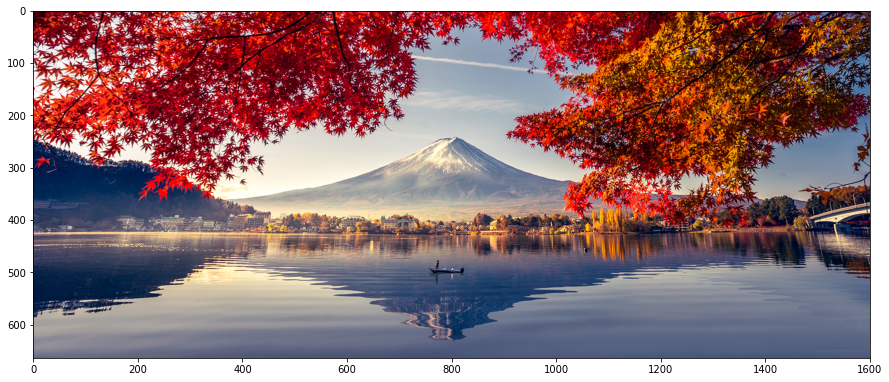

In [3]:
plt.rcParams['figure.figsize'] = (15,15)
file = "image1.jpg"
img = cv2.imread(file)
read_file(file)

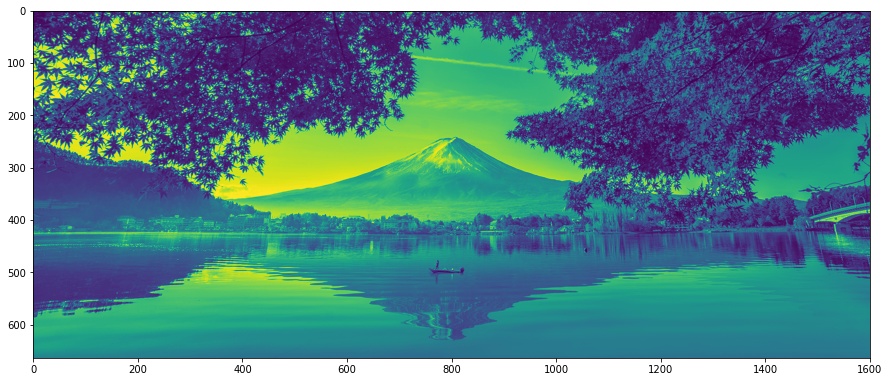

In [4]:
gray_image = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)

In [5]:
gray_image.shape

(664, 1601)

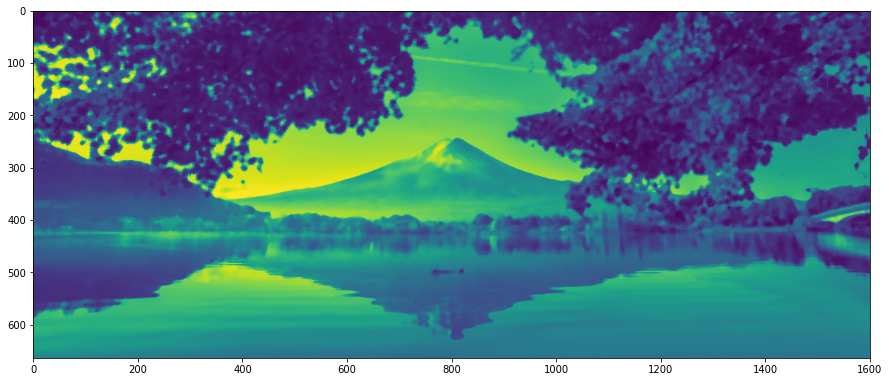

In [6]:
blur_image = cv2.medianBlur(gray_image,9)
plt.imshow(blur_image)

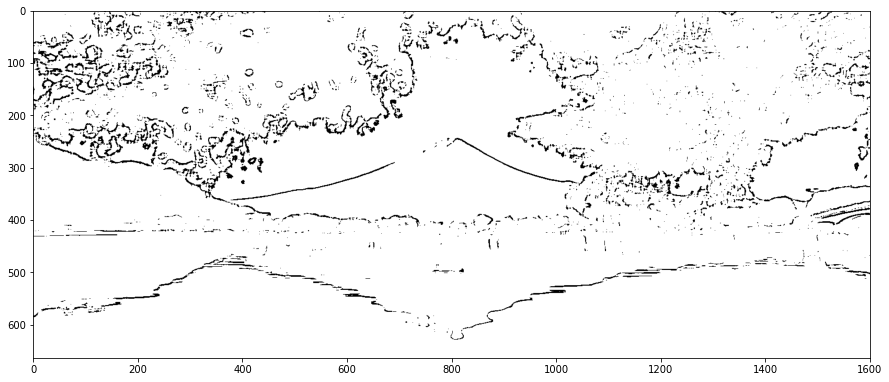

In [11]:
edged_image = cv2.adaptiveThreshold(blur_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,10)
plt.imshow(edged_image,cmap='gray')

In [8]:
np.array(img).shape

(664, 1601, 3)

In [9]:
data = np.float32(img).reshape((-1,3))
data

array([[ 19.,   2., 147.],
       [ 17.,   0., 115.],
       [ 16.,   0., 102.],
       ...,
       [125.,  89.,  73.],
       [124.,  90.,  74.],
       [123.,  92.,  71.]], dtype=float32)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
ret,label,center = cv2.kmeans(data,50,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)

result = center[label.flatten()]
result = result.reshape(img.shape)
plt.imshow(result)

In [ ]:
blur2 = cv2.medianBlur(result,9)
plt.imshow(blur2)

In [ ]:
cartoon = cv2.bitwise_and(blur2,blur2,mask=edged_image)
plt.imshow(cartoon)